In [1]:
# Words to remove (Translated by Google)
words_to_remove = ["(Translated by Google)"]
pattern = re.compile(r'\b(?:%s)\b' % '|'.join(words_to_remove))

def remove_words(row):
    return re.sub(pattern, '', row['review'])

df['review_t'] = df.apply(remove_words, axis=1)
df['review_t'] = df['review_t'].apply(lambda x: x.replace("(", "").replace(")", ""))

NameError: ignored

In [ ]:
# Words to remove (Translated by Google) after Original
keyword = "Original"
df['review_t'] = df['review_t'].apply(lambda x: " ".join(x.split()[:x.split().index(keyword)]) if keyword in x else x)

In [ ]:
# Remove Bad/Foul words
foul_words = ['fuck', 'suck', 'ass']

def filter_foul_words(text):
    pattern = re.compile('|'.join(foul_words), re.IGNORECASE)
    return pattern.sub('****', text)
    
df['filtered_review'] = df['review_t'].apply(filter_foul_words)

In [ ]:
# Remove URL's
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

df['filtered_review1'] = df['filtered_review'].apply(remove_urls)

In [ ]:
# Remove website
def remove_website_links(text):
    return re.sub(r'\bhttps?://\S+', '', text)

df['filtered_review_URL'] = df['filtered_review1'].apply(remove_website_links)

In [ ]:
#website_pattern = r'http[s]?://www.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
website_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# Define function to apply pattern to each string in column
def remove_website_links(text):
    return re.sub(website_pattern, '', text)

# Apply function to column using apply method
df['filtered_review_URL'] = df['filtered_review_URL'].apply(remove_website_links)

In [ ]:
pip install urlextract
# Define a regex pattern to match any type of URL
url_pattern = re.compile(r'(https?://|www\.)\S+')

# Remove URLs from the 'review_text' column using str.replace()
df['review_text_without_urls'] = df['filtered_review_URL'].str.replace(url_pattern, '')

df.drop('review_text_without_urls', axis=1, inplace=True)

In [ ]:
# Handle emoji

pip install vaderSentiment
pip install emoji

import emoji
from textblob import TextBlob

# Define a function to analyze the sentiment of text
def analyze_sentiment(text):
    # Replace emojis with their textual descriptions
    text = emoji.demojize(text)
    # Analyze the sentiment using TextBlob
    sentiment = TextBlob(text).sentiment.polarity
    # Return the sentiment score
    return sentiment

# Test the function with a string that contains emojis
text = "😁 great"
sentiment = analyze_sentiment(text)
print(sentiment)


In [2]:
## Importing Libraries

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Final_Dataset_V2.xlsx to Final_Dataset_V2.xlsx


In [4]:
df = pd.read_excel('Final_Dataset_V2.xlsx')

In [14]:
df.head()

,review,rating
0,Lost in Hartsfield I swear I hate ATL airport ...,1
1,Atlanta airport trash ðŸ˜«,1
2,"flight got fucking canceled, might have to spe...",1
3,"Disgusting. Took one bite, spit it out and th...",1
4,donâ€™t ever get lost in Atlanta airport the e...,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df['review'] = df['review'].fillna('')

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Convert the 'review' column to a matrix of TF-IDF features
X = vectorizer.fit_transform(df['review'].values.astype('U'))

# Extract the 'rating' column as the target variable
y = df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.62      0.62      0.62       599
           2       0.49      0.50      0.49       636
           3       0.42      0.43      0.42       574
           4       0.55      0.51      0.53       599
           5       0.72      0.75      0.74       592

    accuracy                           0.56      3000
   macro avg       0.56      0.56      0.56      3000
weighted avg       0.56      0.56      0.56      3000



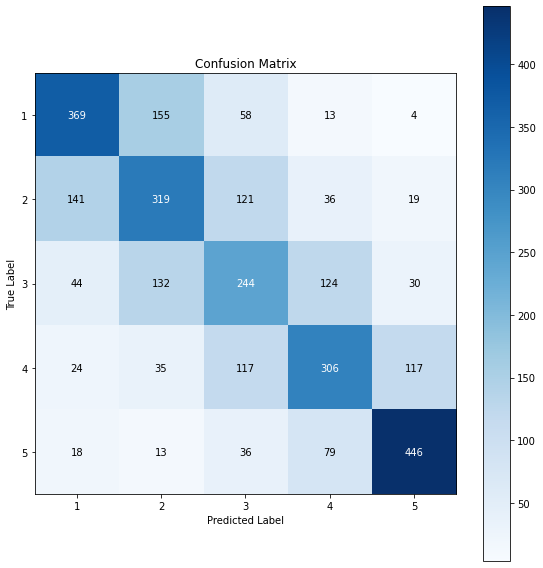

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
plt.colorbar(im)
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, sorted(set(y_test)))
plt.yticks(tick_marks, sorted(set(y_test)))

# Add text annotations inside the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
fig.tight_layout()
plt.show()